In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Load telemetry data
df = pd.read_csv("../data/PdM_telemetry.csv")

# Convert datetime
df["datetime"] = pd.to_datetime(df["datetime"])

In [9]:
df.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   datetime   876100 non-null  datetime64[ns]
 1   machineID  876100 non-null  int64         
 2   volt       876100 non-null  float64       
 3   rotate     876100 non-null  float64       
 4   pressure   876100 non-null  float64       
 5   vibration  876100 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 40.1 MB


In [11]:
print("Number of rows:", df.shape[0])
print("Number of machines:", df["machineID"].nunique())
print("Time range:", df["datetime"].min(), "to", df["datetime"].max())


Number of rows: 876100
Number of machines: 100
Time range: 2015-01-01 06:00:00 to 2016-01-01 06:00:00


Data logged every hour for 1 hour from 100 machines with time range being 2015-01-01 06:00:00 to 2016-01-01 06:00:00

In [12]:
# Check for missing and duplicate values
df.isna().sum()
df.duplicated().sum()


np.int64(0)

In [13]:
df[["volt", "rotate", "pressure", "vibration"]].describe()


,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000
mean,170.777736,446.605119,100.858668,40.385007
std,15.509114,52.673886,11.048679,5.370361
min,97.333604,138.432075,51.237106,14.877054
25%,160.304927,412.305714,93.498181,36.777299
50%,170.607338,447.558150,100.425559,40.237247
75%,181.004493,482.176600,107.555231,43.784938
max,255.124717,695.020984,185.951998,76.791072


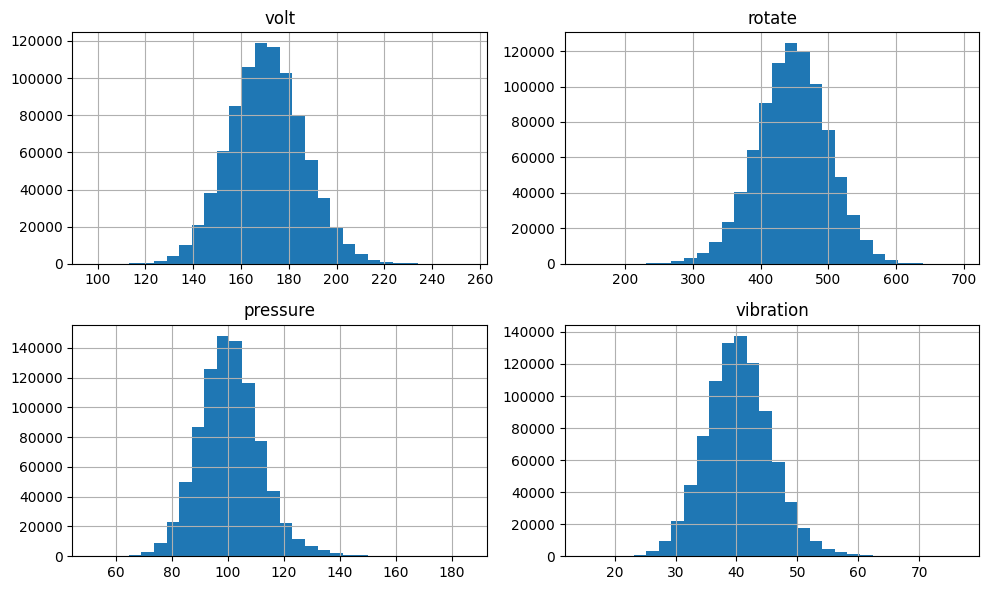

In [14]:
df[["volt", "rotate", "pressure", "vibration"]].hist(
    bins=30, figsize=(10, 6)
)
plt.tight_layout()
plt.show()


In [15]:
machine_id = 1
df_m = df[df["machineID"] == machine_id]

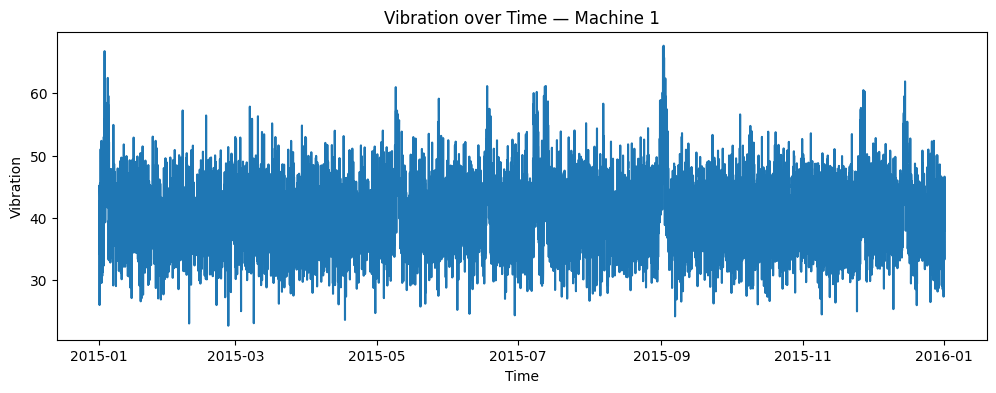

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(df_m["datetime"], df_m["vibration"])
plt.title(f"Vibration over Time — Machine {machine_id}")
plt.xlabel("Time")
plt.ylabel("Vibration")
plt.show()


In [17]:
df[["volt", "rotate", "pressure", "vibration"]].corr()


,volt,rotate,pressure,vibration
volt,1.000000,-0.001511,0.001652,0.002390
rotate,-0.001511,1.000000,-0.000688,-0.003056
pressure,0.001652,-0.000688,1.000000,0.001395
vibration,0.002390,-0.003056,0.001395,1.000000


In [18]:
vib_mean = df["vibration"].mean()
vib_std = df["vibration"].std()

threshold = vib_mean + 3 * vib_std
threshold

np.float64(56.49608844629995)